# ATE 252 Final Capstone Project
   ### Kayla Bracall Spring 2020

This project aims to look at fatality among older drivers, specifically those ages 65 and older. Are older drivers more likely to be involved in a fatal accident? Are drivers 75 and older more likely to be involved in a fatal accident than those aged 65 to 74? What are the most fatal driving conditions for older drivers?

In [67]:
import numpy as np
import pandas as pd
import matplotlib as mpt
import csv

In [205]:
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# set constants 
TOTAL_CRASHES = 2751551 # full number of crashes, pulled from https://data.pa.gov/Public-Safety/Crash-Incident-Details-CY-1997-Current-Annual-Coun/dc5b-gebx
TOTAL_FATALITIES = 30640 # this information was gathered from https://www.penndot.gov/TravelInPA/Safety/Pages/Crash-Facts-and-Statistics.aspx
AGED_DRIVER_CRASHES = 398905 # number of crashes involving a driver ages 65 +

crashes = pd.read_csv('Capstone_finalproject.csv') # read in csv file that was transformed in OpenRefine 
# this dataframe only contains drivers 65 and older
# additionally, it has changed text columns that were labelled "Yes" and "No" to 0 and 1 so that the data can be more easily
# worked with. This data is from the years 1997 - 2018

### Set up data frames to work with:

In [168]:
'''Create new data frames of fatal crashes, crashes involving drivers ages 65-74, and crashes involving drivers ages 75+'''

# pull out only fatal crashes
fatalitiesdf = crashes[crashes['Fatal'] > 0]
#print(fatalitiesdf)

# create data frame of only drivers age 65 to 74
driver_65to74_df = crashes[crashes['Driver 65 - 74 Years Old'] > 0]
#print(driver_65to74_df)

# create data frame of only drivers 75+
driver_75plus_df = crashes[crashes['Driver 75 Plus']> 0]
#print(driver_75plus_df)

In [169]:
print('How many drivers involved in a crash in the years 1997-2018 were ages 65 to 74?')
print(driver_65to74_df['Crash Record Number'].count()) # from the 65-74 data frame, count crash numbers

How many drivers involved in a crash in the years 1997-2018 were ages 65 to 74?
240858


In [170]:
print('How many drivers involved in a crash in the years 1997-2018 were ages 75 and older?')
print(driver_75plus_df['Crash Record Number'].count()) # from the 75 plus data frame, count crash numbers


How many drivers involved in a crash in the years 1997-2018 were ages 75 and older?
183772


In [116]:
print('What is the fatality rate for all drivers?')
total_fatal_percentage = (TOTAL_FATALITIES / TOTAL_CRASHES) *100/
print(total_fatal_percentage, '%')

What is the fatality rate for all drivers?
1.1135537738533647 %


In [156]:
fatal_count = fatalitiesdf['Crash Record Number'].count() # shows us that 5745 crashes had a "Yes" value for the Fatal column
print('Of drivers aged 65+, what is the percentage of fatal crashes?')

# since a fatal crash is the boolean value '1,' we can use sum on the fatal column to total all fatal crashes 
fatal_percentage = (fatal_count/AGED_DRIVER_CRASHES)*100 
print(fatal_percentage, '%')

Of drivers aged 65+, what is the percentage of fatal crashes?
1.3725072385655732 %


In [157]:
young_fatal = TOTAL_FATALITIES - fatal_count
young_drivers = TOTAL_CRASHES - AGED_DRIVER_CRASHES

print('What is the fatality rate for drivers younger than 65?')
young_fatal_percentage = (young_fatal/young_drivers)*100
print(young_fatal_percentage, '%')

What is the fatality rate for drivers younger than 65?
1.0696466871769064 %


Text(0.5, 0, 'Age Groups')

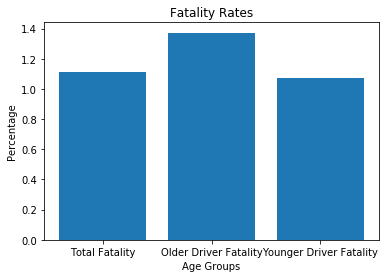

In [208]:
names = ['Total Fatality', 'Older Driver Fatality', 'Younger Driver Fatality']
values = [total_fatal_percentage , fatal_percentage, young_fatal_percentage]
plt.bar(names, values)
plt.title('Fatality Rates')
plt.ylabel('Percentage')
plt.xlabel('Age Groups')

### Findings

* The total fatality rate for all drivers is 1.11%
* The fatality rate for drivers ages 65 and older is 1.37%
* The fatality rate for drivers younger than 65 is 1.07%

As such, we can see that older drivers are slightly more likely to be involved in a fatal accident, though whether this difference is statisically signficant would take further analysis.

The next question is "Are drivers 75 and older more likely to be involved in a fatal accident than those ages 65 to 74?"

In [210]:
print('Is there a higher fatality chance for drivers aged 75+ vs drivers aged 65-74?')
print('')
fatal_65to74 = driver_65to74_df['Fatal'] # pull out fatal crashes for drivers aged 65-74
crash_count_65to74 = (driver_65to74_df['Crash Record Number'].count()) # get total crashes for drivers aged 65-74
perc_65to74 = (sum(fatal_65to74))/crash_count_65to74*100
print('Fatality rate for drivers aged 65 to 74:')
print(perc_65to74, '%')

print('')
print('Fatalilty rate for drivers 75 and older: ')
fatal_75plus = driver_75plus_df['Fatal'] # pull out fatal crashes for drivers aged 75 plus
crash_count_75plus = (driver_75plus_df['Crash Record Number'].count()) # pull total crashes for drivers aged 75 +
perc_75plus = (sum(fatal_75plus))/crash_count_75plus*100
print(perc_75plus, '%')

Is there a higher fatality chance for drivers aged 75+ vs drivers aged 65-74?

Fatality rate for drivers aged 65 to 74:
1.1562829551021763 %

Fatalilty rate for drivers 75 and older: 
1.6629301525803712 %


Text(0.5, 0, 'Age Groupings')

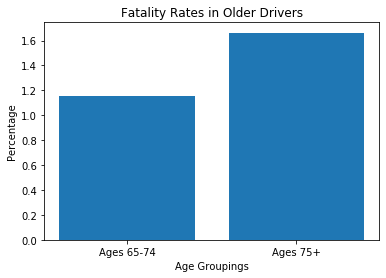

In [211]:
names = ['Ages 65-74', 'Ages 75+']
values = [perc_65to74, perc_75plus]
plt.bar(names, values)
plt.title('Fatality Rates in Older Drivers')
plt.ylabel('Percentage')
plt.xlabel('Age Groupings')

### Findings

We can see that drivers 75 and older are more likely to be involved in a fatal crash than those aged 65-74. Again, determining if this difference is statistically significant would take further analysis. 

### Additional Analysis 

What conditions are most fatal to older drivers?

### Fatigue

In [185]:
fatal_count = fatalitiesdf['Crash Record Number'].count() # count fatalities 
print('Total fatalities in older drivers:', fatal_count)

Total fatalities in older drivers: 5475


In [197]:
fatigue_yes = (fatalitiesdf[fatalitiesdf['Fatigue / Asleep']>0]) # pull fatal wrecks in which fatigue was a factor
fatigue_count = fatigue_yes['Crash Record Number'].count() # get count of fatigue related fatal crashes
fatigue_perc = (fatigue_count/fatal_count)*100
print('What percentage of fatal crashes in older drivers are related to fatigue?')
print(fatigue_perc, '%')

What percentage of fatal crashes in older drivers are related to fatigue?
1.8995433789954337 %


### Road Conditions 

In [212]:
wet_road = fatalitiesdf[fatalitiesdf['Wet Road']>0] # pull out fatal crashes where wet road conditions was a factor
wet_count = wet_road['Wet Road'].count() # total crashes where wet road was a factor
wet_perc = (wet_count/fatal_count)*100 # calculate percentage 

# repeat for snow slush and icy road conditions 
snow_road = fatalitiesdf[fatalitiesdf['Snow Slush Road']>0] 
snow_count= snow_road['Snow Slush Road'].count()
snow_perc = (snow_count/fatal_count)*100
icy_road = fatalitiesdf[fatalitiesdf['Icy Road']>0]
icy_count = icy_road['Icy Road'].count()
icy_perc = (icy_count/fatal_count)*100

print('What percentage of fatal crashes in older drivers are related to wet road conditions?')
print(wet_perc, '%')
print('')
print('What percentage of fatal crashes in older drivers are related to snowy road conditions?')
print(snow_perc, '%')
print('')
print('What percentage of fatal crashes in older drivers are related to icy road conditions?')
print(icy_perc, '%')

What percentage of fatal crashes in older drivers are related to wet road conditions?
13.863013698630136 %

What percentage of fatal crashes in older drivers are related to snowy road conditions?
2.958904109589041 %

What percentage of fatal crashes in older drivers are related to icy road conditions?
1.643835616438356 %


Text(0.5, 0, 'Road Conditions')

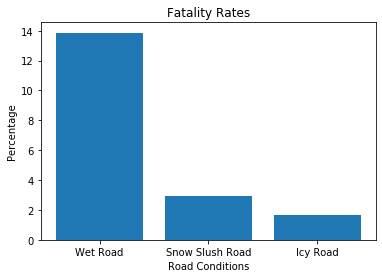

In [214]:
names = ['Wet Road', 'Snow Slush Road', 'Icy Road']
values = [wet_perc, snow_perc, icy_perc]
plt.bar(names, values)
plt.title('Fatality Rates')
plt.ylabel('Percentage')
plt.xlabel('Road Conditions')

### Seatbelt Usage

In [201]:
unbelted = fatalitiesdf[fatalitiesdf['Unbelted']>0] # pull out fatal crashes where the driver was unbelted
unbelted_count = unbelted['Unbelted'].count() # total unbelted count
unbelted_perc = (unbelted_count/fatal_count)*100 # calculate percentage 

print('What percentage of fatal crashes in older drivers are related to not wearing a seatbelt?')
print(unbelted_perc, '%')

What percentage of fatal crashes in older drivers are related to not wearing a seatbelt?
40.84018264840182 %


### Alcohol and Drug Use 

In [202]:
alcohol_use = fatalitiesdf[fatalitiesdf['Drinking Driver']>0] # pull out fatal crashes where driver was drinking 
alcohol_count = alcohol_use['Drinking Driver'].count() # total drinking driver count 
alcohol_perc = (alcohol_count/fatal_count)*100 # calculate percentage 
print('What percentage of fatal crashes in older drivers are related to alcohol use by the driver?')
print(alcohol_perc, '%')
print('')

drug_use = fatalitiesdf[fatalitiesdf['Drugged Driver']>0] # pull out fatal crashes where driver was drugged 
drug_count = drug_use['Drugged Driver'].count() # total drugged river 
drug_perc = (drug_count/fatal_count)*100 # calculate percentage
print('What percentage of fatal crashes in older drdivers are related to drug use by the driver?')
print(drug_perc, '%')

What percentage of fatal crashes in older drivers are related to alcohol use by the driver?
9.60730593607306 %

What percentage of fatal crashes in older drdivers are related to drug use by the driver?
3.5981735159817356 %


Text(0.5, 0, 'Substance Use')

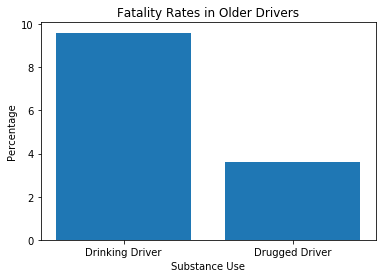

In [215]:
names = ['Drinking Driver', 'Drugged Driver']
values = [alcohol_perc, drug_perc]
plt.bar(names, values)
plt.title('Fatality Rates in Older Drivers')
plt.ylabel('Percentage')
plt.xlabel('Substance Use')